<a href="https://colab.research.google.com/github/akshay-aiml/Powergrid-Stock-price-prediction/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [5]:
import yfinance as yf
import datetime as dt
stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2024,11,1)

df = yf.download(stock, start, end)

/tmp/ipython-input-2512783947.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [6]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.405308,35.272180,26.784307,28.926408,855215656
2007-10-08,30.746403,33.500533,30.553130,33.500533,126671715
2007-10-09,32.840183,33.130091,29.103586,30.762505,116725709
2007-10-10,33.146187,33.822640,32.856279,33.693791,67931378
2007-10-11,36.850567,38.654441,32.856276,38.654441,106320954


In [7]:
df.shape

(4208, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4208 entries, 2007-10-05 to 2024-10-31
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4208 non-null   float64
 1   (High, POWERGRID.NS)    4208 non-null   float64
 2   (Low, POWERGRID.NS)     4208 non-null   float64
 3   (Open, POWERGRID.NS)    4208 non-null   float64
 4   (Volume, POWERGRID.NS)  4208 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 197.2 KB


In [9]:
df.isnull().sum()

,,0
Price,Ticker,
Close,POWERGRID.NS,0
High,POWERGRID.NS,0
Low,POWERGRID.NS,0
Open,POWERGRID.NS,0
Volume,POWERGRID.NS,0


In [10]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4208.000000,4208.000000,4208.000000,4208.000000,4.208000e+03
mean,79.141362,80.170391,78.124958,79.178243,1.188963e+07
std,63.296897,64.036504,62.509395,63.278623,2.061999e+07
min,18.919937,20.224760,16.962703,20.126898,0.000000e+00
25%,36.371857,36.945685,35.834700,36.409112,4.799653e+06
50%,55.265974,55.904102,54.526376,55.372094,8.344398e+06
75%,82.755177,83.742980,81.773869,82.777689,1.362032e+07
max,354.580750,355.356950,346.576122,353.222365,8.552157e+08


In [11]:
df = df.reset_index()

In [12]:
df.shape

(4208, 6)

In [13]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,2007-10-05,32.405308,35.272180,26.784307,28.926408,855215656
1,2007-10-08,30.746403,33.500533,30.553130,33.500533,126671715
2,2007-10-09,32.840183,33.130091,29.103586,30.762505,116725709
3,2007-10-10,33.146187,33.822640,32.856279,33.693791,67931378
4,2007-10-11,36.850567,38.654441,32.856276,38.654441,106320954


In [14]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [15]:
# candlestick
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])
fig.update_layout(title='PowerGrid Stock Price', yaxis_title='Price')
fig.show()

In [16]:
data1 = df.to_csv('POWERGRID.csv')

In [17]:
data1 = pd.read_csv('POWERGRID.csv')

In [18]:
data1.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,32.40530776977539,35.27217958791646,26.784307105907242,28.9264082901474,855215656
2,1,2007-10-08,30.746402740478516,33.50053279976125,30.553129612468908,33.50053279976125,126671715
3,2,2007-10-09,32.84018325805664,33.13009074581065,29.1035857241229,30.762504919250738,116725709
4,3,2007-10-10,33.14618682861328,33.82264033434599,32.85627943159532,33.69379090326838,67931378


In [19]:
# candlestick
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=data1['Date'],
                open=data1['Open'],
                high=data1['High'],
                low=data1['Low'],
                close=data1['Close'])])
fig.update_layout(title='PowerGrid Stock Price', yaxis_title='Price')
fig.show()

In [20]:
df.drop(['Date'], axis=1, inplace=True)

/tmp/ipython-input-2049800125.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [21]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,32.405308,35.272180,26.784307,28.926408,855215656
1,30.746403,33.500533,30.553130,33.500533,126671715
2,32.840183,33.130091,29.103586,30.762505,116725709
3,33.146187,33.822640,32.856279,33.693791,67931378
4,36.850567,38.654441,32.856276,38.654441,106320954


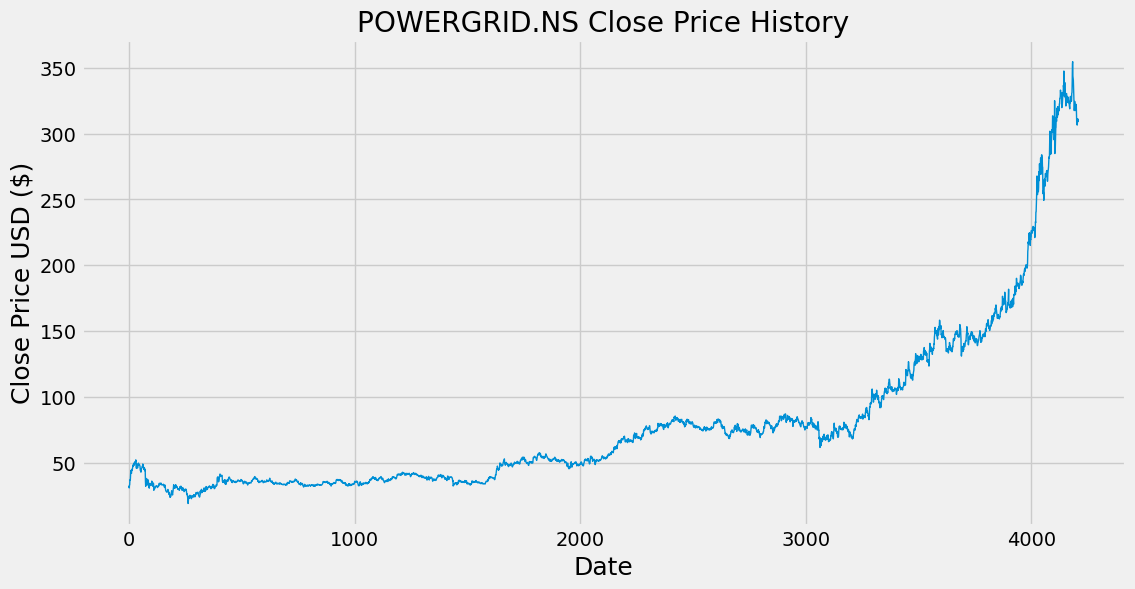

In [22]:
plt.figure(figsize=(12,6))
plt.title(f'{stock} Close Price History')
plt.plot(df['Close'], label = f'{stock} closeing price', linewidth = 1)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

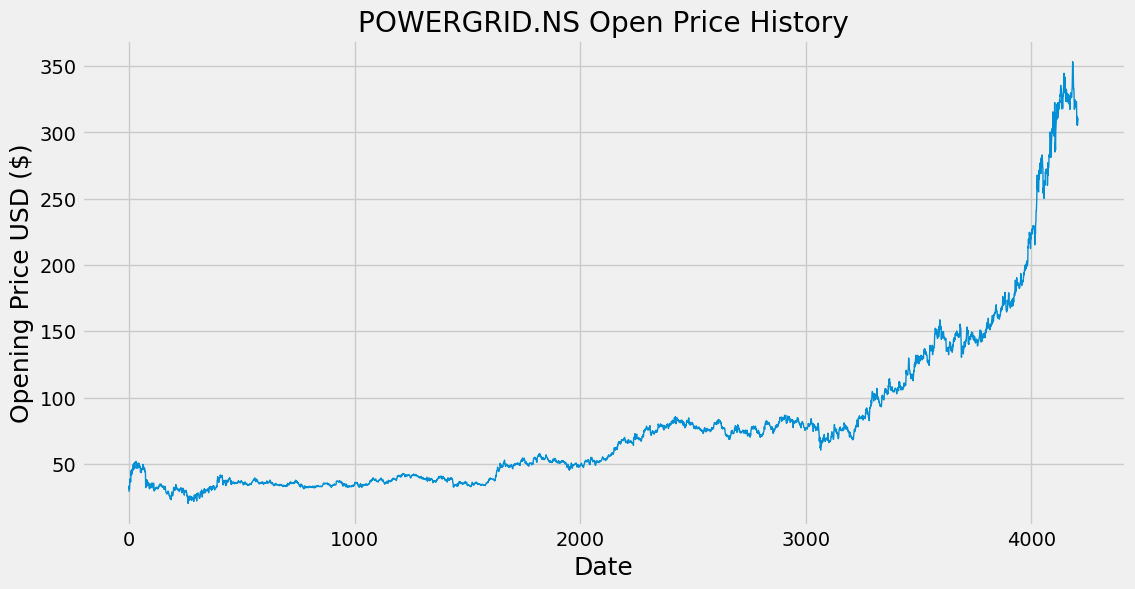

In [23]:
plt.figure(figsize=(12,6))
plt.title(f'{stock} Open Price History')
plt.plot(df['Open'], label = f'{stock} Opening price', linewidth = 1)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Opening Price USD ($)', fontsize=18)
plt.show()

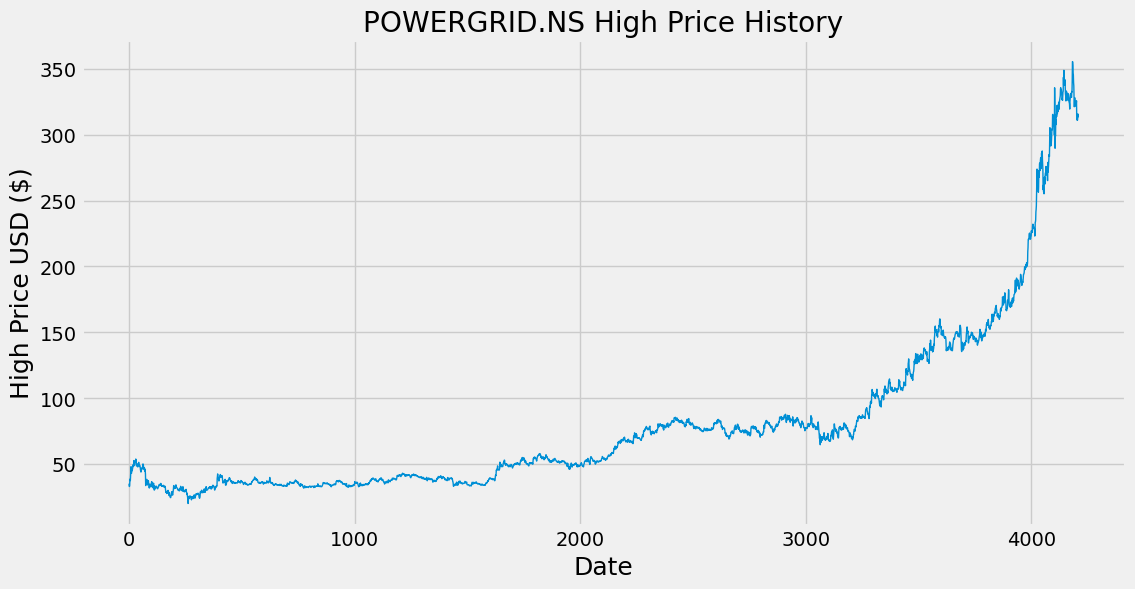

In [24]:
plt.figure(figsize=(12,6))
plt.title(f'{stock} High Price History')
plt.plot(df['High'], label = f'{stock} High price', linewidth = 1)
plt.xlabel('Date', fontsize=18)
plt.ylabel('High Price USD ($)', fontsize=18)
plt.show()

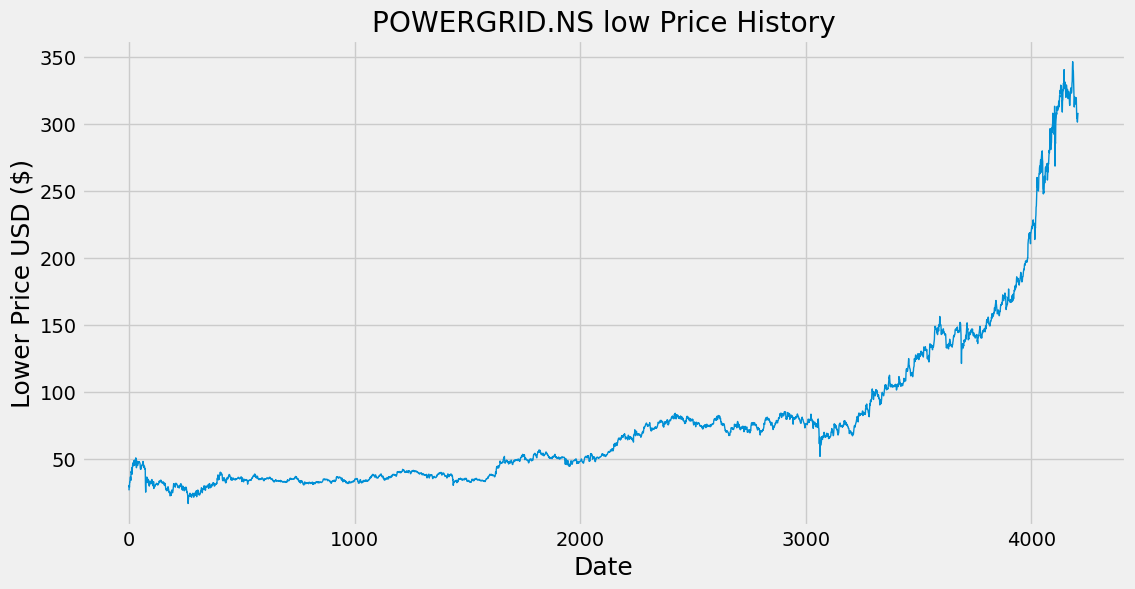

In [25]:
plt.figure(figsize=(12,6))
plt.title(f'{stock} low Price History')
plt.plot(df['Low'], label = f'{stock} Lower price', linewidth = 1)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Lower Price USD ($)', fontsize=18)
plt.show()

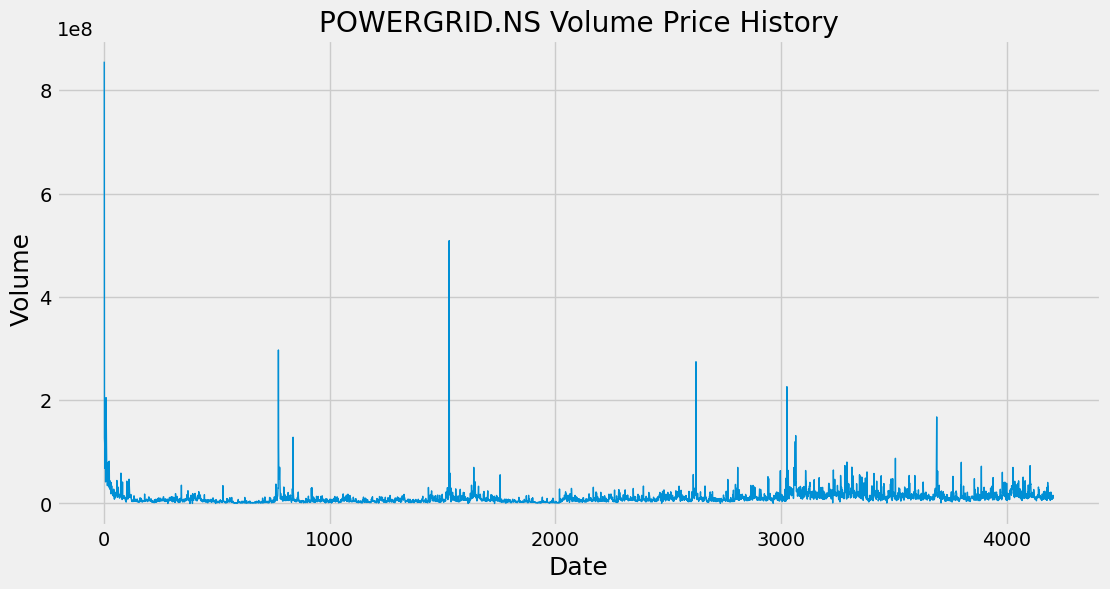

In [26]:
plt.figure(figsize=(12,6))
plt.title(f'{stock} Volume Price History')
plt.plot(df['Volume'], label = f'{stock} Volume price', linewidth = 1)
plt.xlabel('Date', fontsize=18)
plt.ylabel(' Volume', fontsize=18)
plt.show()

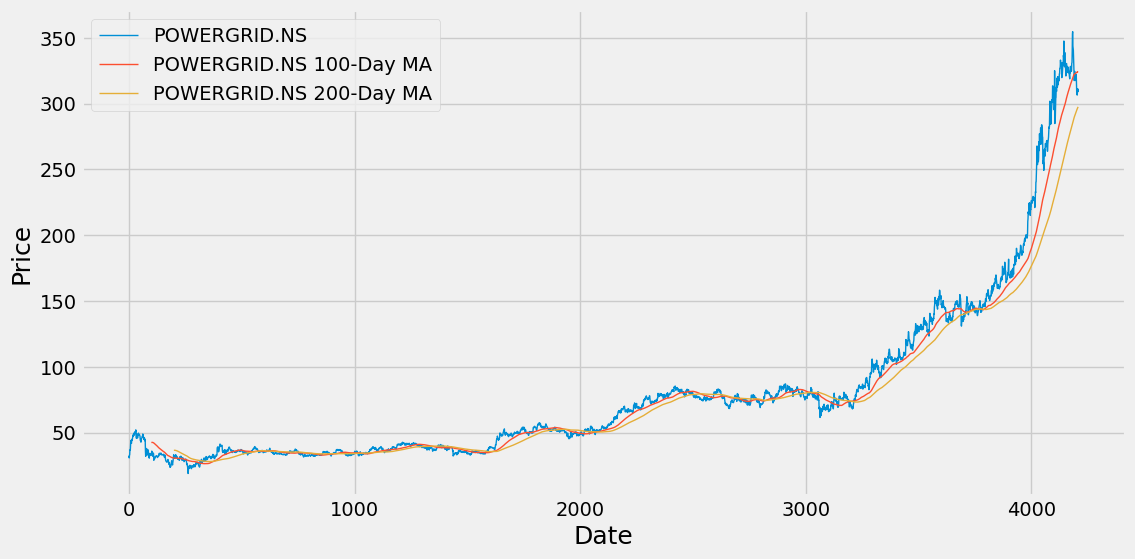

In [28]:
# moving Average
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()

plt.figure(figsize = (12,6))
plt.plot(df.Close, label = f'{stock}', linewidth = 1)
plt.plot(ma100, label = f"{stock} 100-Day MA", linewidth = 1)
plt.plot(ma200, label = f"{stock} 200-Day MA", linewidth = 1)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price', fontsize = 18)
plt.legend()
plt.show()

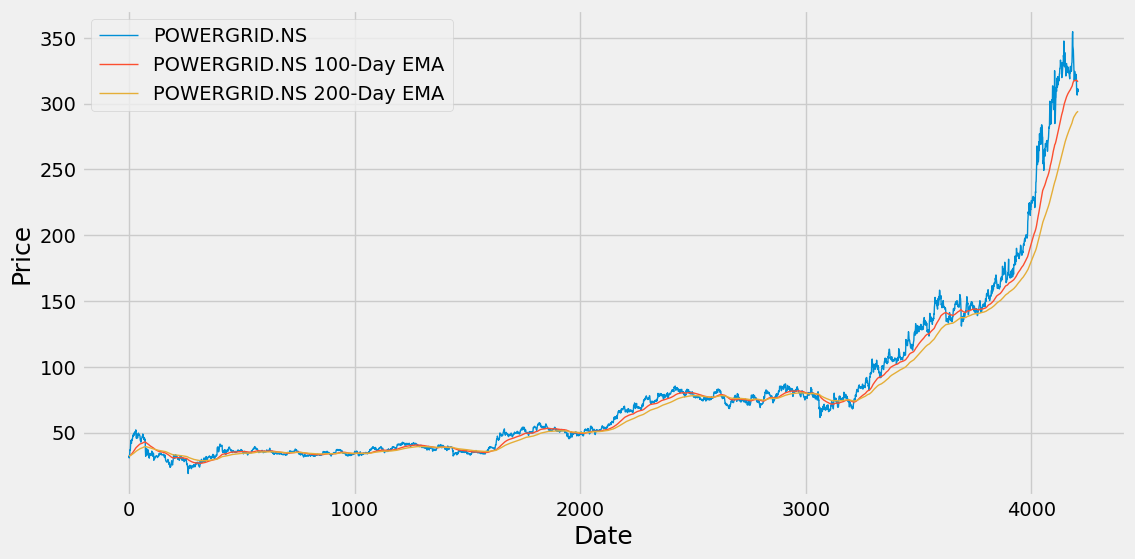

In [29]:
# exponential moving avg
ema100 = df.Close.ewm(span=100, adjust=False).mean()
ema200 = df.Close.ewm(span=200, adjust=False).mean()


plt.figure(figsize = (12,6))
plt.plot(df.Close, label = f'{stock}', linewidth = 1)
plt.plot(ema100, label = f"{stock} 100-Day EMA", linewidth = 1)
plt.plot(ema200, label = f"{stock} 200-Day EMA", linewidth = 1)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price', fontsize = 18)
plt.legend()
plt.show()

In [30]:
# divide the data into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [31]:
data_training.shape

(2945, 1)

In [32]:
data_testing.shape

(1263, 1)

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [34]:
ma100

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4203,323.594424
4204,323.834954
4205,324.069892
4206,324.268576


In [35]:
data_training_sl = scaler.fit_transform(data_training)
data_testing_sl = scaler.transform(data_testing)

In [38]:
X_train = []
y_train = []

for i in range(100, data_training_sl.shape[0]):
    X_train.append(data_training_sl[i-100: i])
    y_train.append(data_training_sl[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [39]:
X_train.shape

(2845, 100, 1)

In [40]:
# model building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

LSTM Input -> 3D Array (batch_size, time_steps, seq_len) LSTM 2D OR 3D 2D -> (batch_sizem units) 3D -> (batch_size, time_steps, units)

In [41]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 19s 95ms/step - loss: 0.0912
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 0.0083
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0070
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0075
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0056
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0057
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0058
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0052
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0049
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0051
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0046
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0043
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0036
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0035
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0034
Ep

In [44]:
past_100_days = data_training.tail(100)

In [46]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [47]:
input_data = scaler.fit_transform(final_df)

In [48]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

x_test,y_test = np.array(x_test), np.array(y_test)

In [49]:
x_test.shape

(1263, 100, 1)

In [50]:
y_pred = model.predict(x_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step


In [51]:
y_pred.shape

(1263, 1)

In [52]:
scaler.scale_

array([0.00341187])

In [53]:
scaler_factor = 1/0.02040336
y_pred = y_pred * scaler_factor
y_test = y_test * scaler_factor

Text(0, 0.5, 'Price')

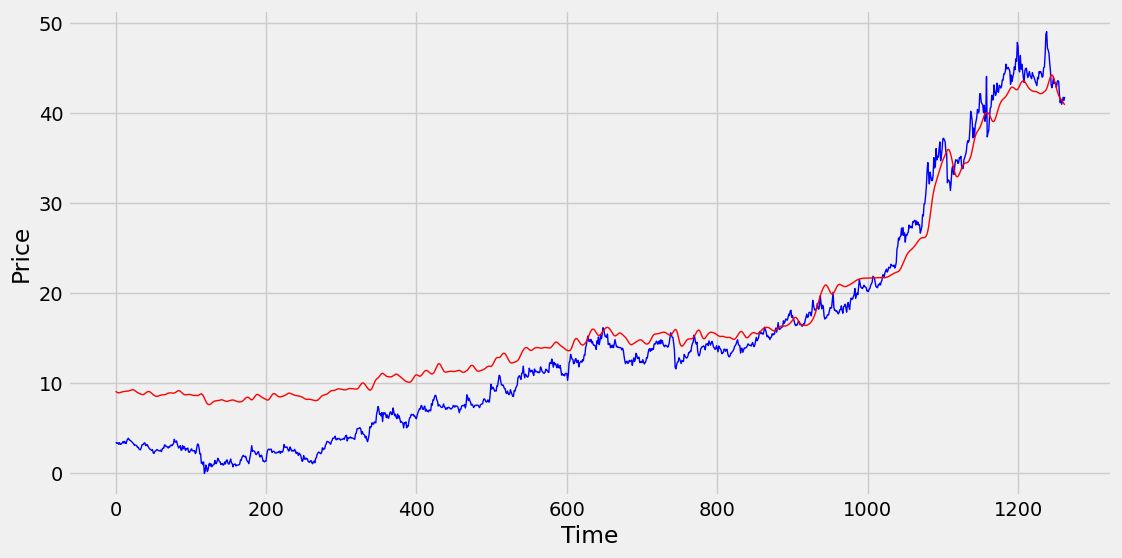

In [56]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price', linewidth = 1)
plt.plot(y_pred, 'r', label = 'Predicted Price', linewidth = 1)
plt.xlabel('Time')
plt.ylabel('Price')

In [55]:
model.save('Stock_model_POWERGRID.h5')